### Functions

Real-world case: **Human Population Growth**

- Initial Population: 7.9 billion (as of 2023)
- Growth Rate: Approximately 1.05% per year

Play with the growth rate and forecast range.

In [1]:
def population_growth(current_population, growth_rate, year, time_step=1):
    if time_step >= 10: # Stop recursion if the maximum number of steps is reached
        return current_population
    
    next_population = growth_rate * current_population

    print(f"{year+time_step}: Population size = {next_population:.2f}") # f-string with decimal formatting to 2 digits
    
    # Recursive call to the next time step
    return population_growth(next_population, growth_rate, year, time_step + 1)


year = 2023
initial_population = 7_900_000_000
growth_rate = 1.0105  # 1.05% growth rate per year


final_population = population_growth(initial_population, growth_rate, year)

2024: Population size = 7982950000.00
2025: Population size = 8066770975.00
2026: Population size = 8151472070.24
2027: Population size = 8237062526.97
2028: Population size = 8323551683.51
2029: Population size = 8410948976.19
2030: Population size = 8499263940.44
2031: Population size = 8588506211.81
2032: Population size = 8678685527.03


The next function implements the same thing, but using a for-loop instead of recursion. The notation is slightly changed to describe that behaviour as an [AR(1)](https://en.wikipedia.org/wiki/Autoregressive_model) model (auto-regressive model of order 1).

In [2]:
import random

def ar_population_growth(initial_population, beta, sigma, year):
    # Initialize
    population = [initial_population]
    years = [year]
    
    for t in range(1, 10):
        # Simulate natural fluctuations
        xi_t = random.gauss(mu=0.0, sigma=sigma)
        
        # Calculate the next population size using the AR(1) model
        next_population = beta * population[t-1] + xi_t
        
        population.append(next_population)
        years.append(year+t)
        
        print(f"{year+t}: Population size = {next_population:.0f}")
    
    return population, years

year = 2023
initial_population = 7_900_000_000
# Autoregressive coefficient for 1.05% growth rate
beta = 1.0105
# Standard deviation for fluctuations (1% of initial population)
## set to zero to get same result as in the recursive function above
sigma = 0.01 * initial_population  


final_population, years = ar_population_growth(initial_population, beta, sigma, year)

2024: Population size = 7970682368
2025: Population size = 8053116637
2026: Population size = 8228186699
2027: Population size = 8296032757
2028: Population size = 8487087289
2029: Population size = 8604626123
2030: Population size = 8635364700
2031: Population size = 8764045322
2032: Population size = 8943581803


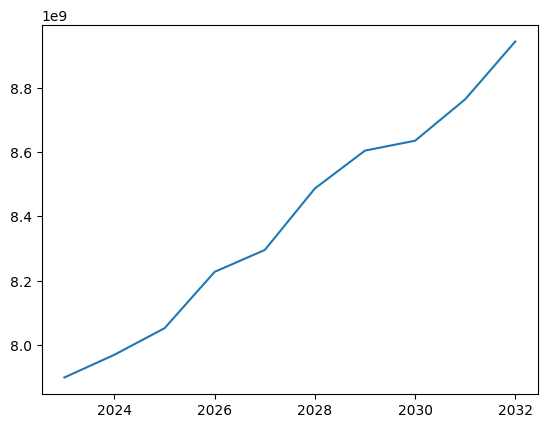

In [3]:
import matplotlib.pyplot as plt

plt.plot(years, final_population)

## The Lotka-Volterra model (Task 1)

... is a pair of first-order, non-linear, differential equations used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey. The model is given by:

$$
\frac{dR}{dt} = \alpha R - \beta RF
$$
$$
\frac{dF}{dt} = \delta RF - \gamma F
$$

where:
- $ R $ is the number of prey (rabbits).
- $ F $ is the number of predators (foxes).
- $ \alpha $ is the natural growth rate of prey.
- $ \beta $ is the natural death rate of prey due to predation.
- $ \gamma $ is the natural death rate of predators.
- $ \delta $ is the natural growth rate of predators due to predation.

The Euler forward scheme is a simple numerical method to solve ordinary differential equations. It approximates the solution by taking small time steps and updating the state based on the derivative at the current time.

**Euler Forward Scheme for the Lotka-Volterra Model**

The Euler forward scheme approximates the solution by updating the populations at each time step $ t $ using the following formulas:
$$
R_{n+1} = R_n + \left( \alpha R_n - \beta R_n F_n \right) \Delta t
$$
$$
F_{n+1} = F_n + \left( \delta R_n F_n - \gamma F_n \right) \Delta t
$$

where:

- $ R_n $ is the population of rabbits at time step $ n $.
- $ F_n $ is the population of foxes at time step $ n $.
- $ \Delta t $ is the time step size.
- $ \alpha $, $ \beta $, $ \delta $, and $ \gamma $ are the parameters of the model.

**Task:** Implement the forward Euler scheme for this system with uniform time discretisation and the following parameters:

- $\alpha = 0.1$, $\beta = 0.02$, $\gamma = 0.1$, $\delta = 0.01$
- $R_0 = 40$, $F_0 = 9$
- $t_{\text{max}} = 200$, $\Delta t = 0.1$


In [4]:
# import python packages
import numpy as np
import matplotlib.pyplot as plt
# may take a moment to build the font cache when running online

In [5]:
def euler_forward_lotka_volterra(alpha, beta, gamma, delta, R0, F0, t_max, dt):
    """
    Implements the Euler forward scheme for the Lotka-Volterra model.

    Parameters:
    alpha (float): Natural growth rate of prey.
    beta (float):  Natural death rate of prey due to predation.
    gamma (float): Natural death rate of predators.
    delta (float): Natural growth rate of predators due to predation.
    R0 (float):    Initial number of prey.
    F0 (float):    Initial number of predators.
    t_max (float): Maximum time for the simulation.
    dt (float):    Time step for the simulation.

    Returns:
    t (np.array): Time points.
    R (np.array): Prey population at each time point.
    F (np.array): Predator population at each time point.
    """
    t = np.arange(0, t_max, dt)
    R = np.zeros_like(t)
    F = np.zeros_like(t)
    R[0] = R0
    F[0] = F0

    for i in range(1, len(t)):
        dR_dt = alpha * R[i-1] - beta * R[i-1] * F[i-1]
        dF_dt = delta * R[i-1] * F[i-1] - gamma * F[i-1]
        R[i] = R[i-1] + dR_dt * dt
        F[i] = F[i-1] + dF_dt * dt
        

    return t, R, F

In [6]:
# Parameters for the Lotka-Volterra model
alpha = 0.1  # Natural growth rate of prey
beta = 0.02  # Natural death rate of prey due to predation
gamma = 0.1  # Natural death rate of predators
delta = 0.01 # Natural growth rate of predators due to predation

# Initial conditions
R0 = 40  # Initial number of prey
F0 = 9   # Initial number of predators

# Simulation parameters
t_max = 200  # Maximum time for the simulation
dt = 0.1     # Time step for the simulation

In [7]:
# Run the Euler forward scheme
t, R, F = euler_forward_lotka_volterra(alpha, beta, gamma, delta, R0, F0, t_max, dt)

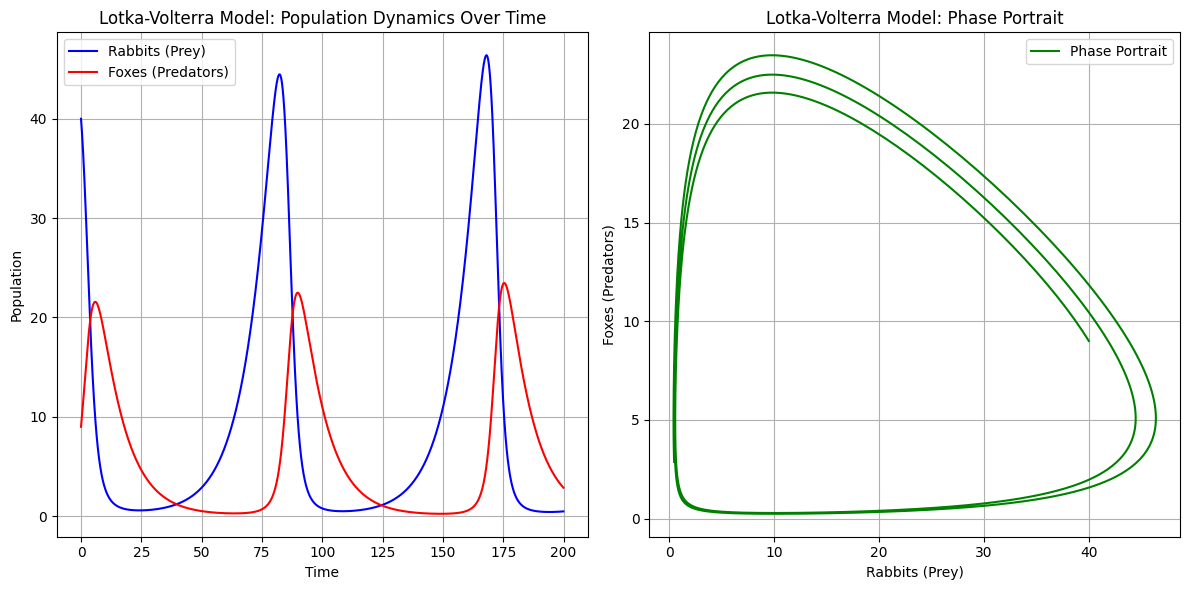

In [8]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Plot prey and predator populations over time
plt.subplot(1, 2, 1)
plt.plot(t, R, label='Rabbits (Prey)', color='b')
plt.plot(t, F, label='Foxes (Predators)', color='r')
plt.title('Lotka-Volterra Model: Population Dynamics Over Time')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

# Plot phase portrait
plt.subplot(1, 2, 2)
plt.plot(R, F, label='Phase Portrait', color='g')
plt.title('Lotka-Volterra Model: Phase Portrait')
plt.xlabel('Rabbits (Prey)')
plt.ylabel('Foxes (Predators)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Let's animate the plot**

In [9]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [10]:
dt2 = 0.1
t, R2, F2 = euler_forward_lotka_volterra(alpha, beta, gamma, delta, R0, F0, t_max, dt2)

every_nth = int(2/dt2)

plt.ioff()  # disable interactive mode to avoid double displayed plots
# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, 50)  # fix x axis
ax.set_ylim(0, 30)  # fix y axis
ax.set_title(f"Lotka-Volterra for dt={dt2}")
ax.set_xlabel('Rabbits (Prey)')
ax.set_ylabel('Foxes (Predators)')
ax.plot(R, F, c="gray", lw=1, ls="dashed", label=f"dt={dt}")
line, = ax.plot([], [], lw=2, c="red", label=f"dt={dt2}")  # init line object
ax.grid(True, ls=":")
plt.legend()

# Initialization function
def init():
    line.set_data([], [])
    return line,

# Animation function
def animate(i):
    line.set_data(R2[:every_nth*i], F2[:every_nth*i])
    return line,

# Create the animation
ani = FuncAnimation(fig, animate, init_func=init, frames=len(t)//every_nth, interval=50, blit=True)

# Display the animation in Jupyter notebook
HTML(ani.to_jshtml())

#### Noisy Observation

Based on the simulated values we generate some noisy data to mimic the observation of rabbits.

In [11]:
# run simulation with given parameters
t, R, F = euler_forward_lotka_volterra(alpha=0.1, beta=0.02, gamma=0.1, delta=0.01, R0=40, F0=9, t_max=200, dt=0.1)

In [12]:
# Now generate noisy observations of the prey population (noisy data)
rng = np.random.default_rng(seed=1337)  # set random number generator with fixed seed for reproducibility
observation_indices = np.arange(start=0, stop=len(t), step=200)
observation_times = dt * observation_indices
# Generate noisy data for the prey population (rabbits)
noisy_data = R[observation_indices] + rng.normal(loc=0, scale=3, size=len(observation_indices))

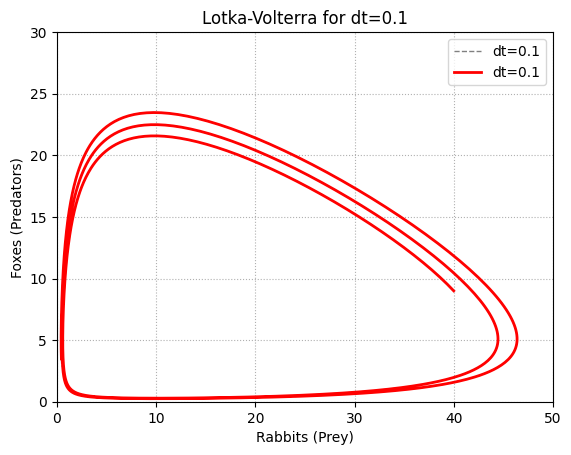

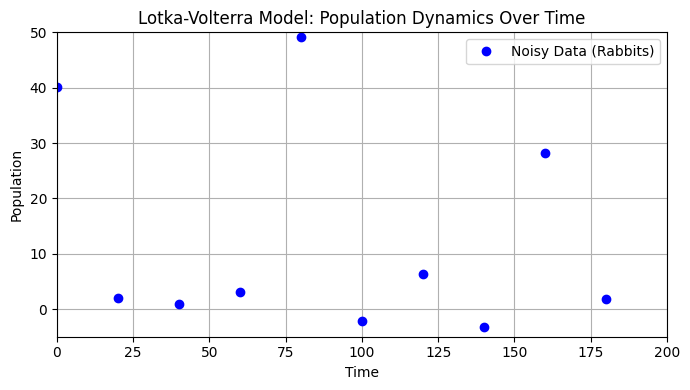

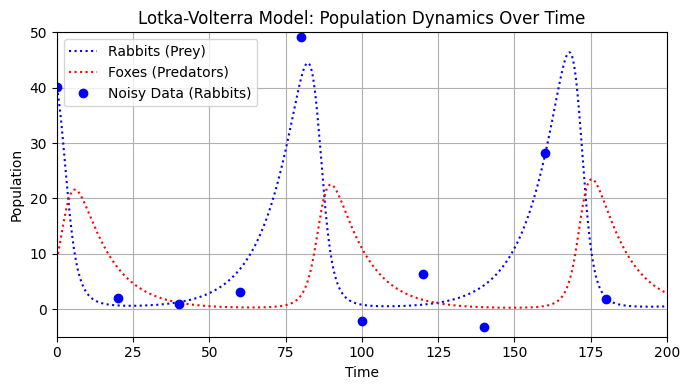

In [13]:
# Create a figure and axis for the third plot
fig1, ax1 = plt.subplots(figsize=(7, 4))
ax1.plot(observation_times, noisy_data, 'o', label='Noisy Data (Rabbits)', color='b')
ax1.set_title('Lotka-Volterra Model: Population Dynamics Over Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Population')
ax1.legend()
ax1.grid(True)
ax1.set_xlim([0, 200])
ax1.set_ylim([-5, 50])
plt.tight_layout()
plt.show()

# Create a figure and axis for the second plot
fig2, ax2 = plt.subplots(figsize=(7, 4))
ax2.plot(t, R, ':', label='Rabbits (Prey)', color='b')
ax2.plot(t, F, ':', label='Foxes (Predators)', color='r')
ax2.plot(observation_times, noisy_data, 'o', label='Noisy Data (Rabbits)', color='b')
ax2.set_title('Lotka-Volterra Model: Population Dynamics Over Time')
ax2.set_xlabel('Time')
ax2.set_ylabel('Population')
ax2.legend()
ax2.grid(True)
ax2.set_xlim([0, 200])
ax2.set_ylim([-5, 50])
plt.tight_layout()
plt.show()

Now we use least-squares fitting to retrieve the model parameters purely based on the noisy observation data.

In [14]:
from scipy.optimize import minimize

# Least squares fitting function to minimize
def least_squares(params, t_obs_ind, observed_prey):
    alpha, beta, gamma, delta, R0, F0 = params
    
    # Solve the Lotka-Volterra system with the current parameters
    t, R, F = euler_forward_lotka_volterra(alpha, beta, gamma, delta, R0, F0, t_max, dt)
    
    # Compute the residual (difference between observed prey and fitted prey)
    fitted_prey = R[t_obs_ind]
    residual = observed_prey - fitted_prey
    return np.sum(residual**2)

# Initial guess for the parameters (close to the true values)
initial_guess = [0.1, 0.02, 0.1, 0.01, 35, 8]

# Perform least squares fitting
result = minimize(least_squares, 
                  initial_guess, 
                  args=(observation_indices, noisy_data), 
                  method='Nelder-Mead')

# Extract fitted parameters
alpha_fitted, beta_fitted, gamma_fitted, delta_fitted, R0_fitted, F0_fitted = result.x

# Solve the system with the fitted parameters
t, R_fit, F_fit = euler_forward_lotka_volterra(alpha_fitted, beta_fitted, gamma_fitted, delta_fitted, R0_fitted, F0_fitted, t_max, dt)

In [15]:
# result
for i in result.x:
    print(i)

0.21362319682499026
0.025951344533359046
0.06773423553773665
0.011242423166235117
40.08547930083374
16.083419354358547


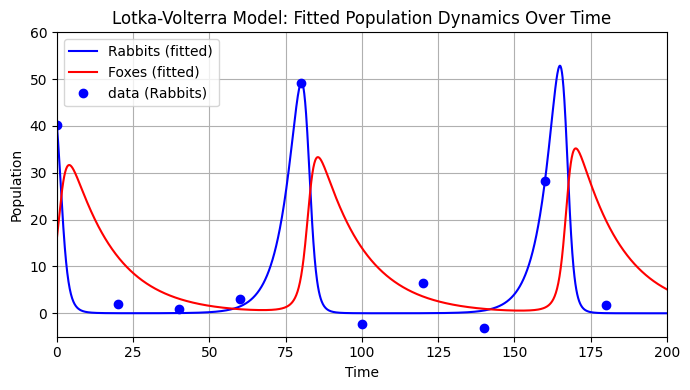

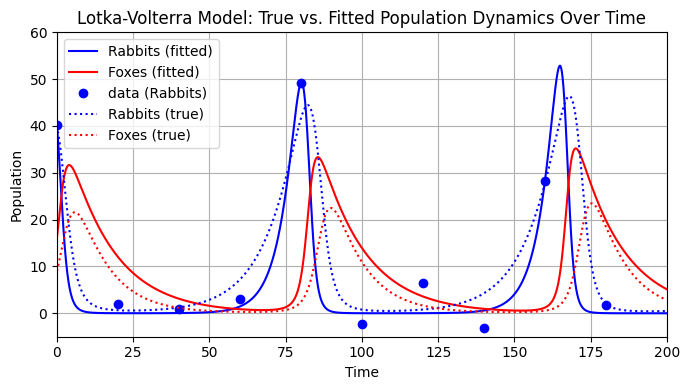

In [16]:
# Create the first figure and axis for fitted populations
fig1, ax1 = plt.subplots(figsize=(7, 4))

# Plot the fitted populations
ax1.plot(t, R_fit, '-', label='Rabbits (fitted)', color='b')
ax1.plot(t, F_fit, '-', label='Foxes (fitted)', color='r')
ax1.plot(observation_times, noisy_data, 'o', color='b', label="data (Rabbits)")
ax1.set_title('Lotka-Volterra Model: Fitted Population Dynamics Over Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Population')
ax1.legend()
ax1.grid(True)
ax1.set_xlim([0, 200])
ax1.set_ylim([-5, 60])
plt.tight_layout()
plt.show()

# Create the second figure and axis for true vs. fitted populations
fig2, ax2 = plt.subplots(figsize=(7, 4))
ax2.plot(t, R_fit, '-', label='Rabbits (fitted)', color='b')
ax2.plot(t, F_fit, '-', label='Foxes (fitted)', color='r')
ax2.plot(observation_times, noisy_data, 'o', color='b', label="data (Rabbits)")
ax2.plot(t, R, ':', label='Rabbits (true)', color='b')
ax2.plot(t, F, ':', label='Foxes (true)', color='r')
ax2.set_title('Lotka-Volterra Model: True vs. Fitted Population Dynamics Over Time')
ax2.set_xlabel('Time')
ax2.set_ylabel('Population')
ax2.legend()
ax2.grid(True)

# Set the x and y limits
ax2.set_xlim([0, 200])
ax2.set_ylim([-5, 60])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()